In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
housing = pd.read_csv(r"C:\Users\Pramod Rathod\Desktop\skillto practice\row data\Housing_data\CodeWithHarry.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# About data

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    **1. CRIM :**      per capita crime rate by town
   
    **2. ZN :**       proportion of residential land zoned for lots over 
                 25,000 sq.ft.
                
    **3. INDUS :**     proportion of non-retail business acres per town
   
    **4. CHAS :**      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
                
    **5. NOX :**       nitric oxides concentration (parts per 10 million)
   
    **6. RM :**       average number of rooms per dwelling
   
    **7. AGE :**       proportion of owner-occupied units built prior to 1940
   
    **8. DIS :**       weighted distances to five Boston employment centres
   
    **9. RAD :**       index of accessibility to radial highways
   
    **10. TAX :**      full-value property-tax rate per $10,000
   
    **11. PTRATIO :**  pupil-teacher ratio by town
   
    **12. B :**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
                
    **13. LSTAT :**    % lower status of the population
   
    **14. MEDV :**     Median value of owner-occupied homes in $1000's
   

8. Missing Attribute Values:  None.

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      501 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PTRA    506 non-null    float64
 11  B       506 non-null    float64
 12  LSTA    506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286541,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703821,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       5
AGE      0
DIS      0
RAD      0
TAX      0
PTRA     0
B        0
LSTA     0
MEDV     0
dtype: int64

In [6]:
housing.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

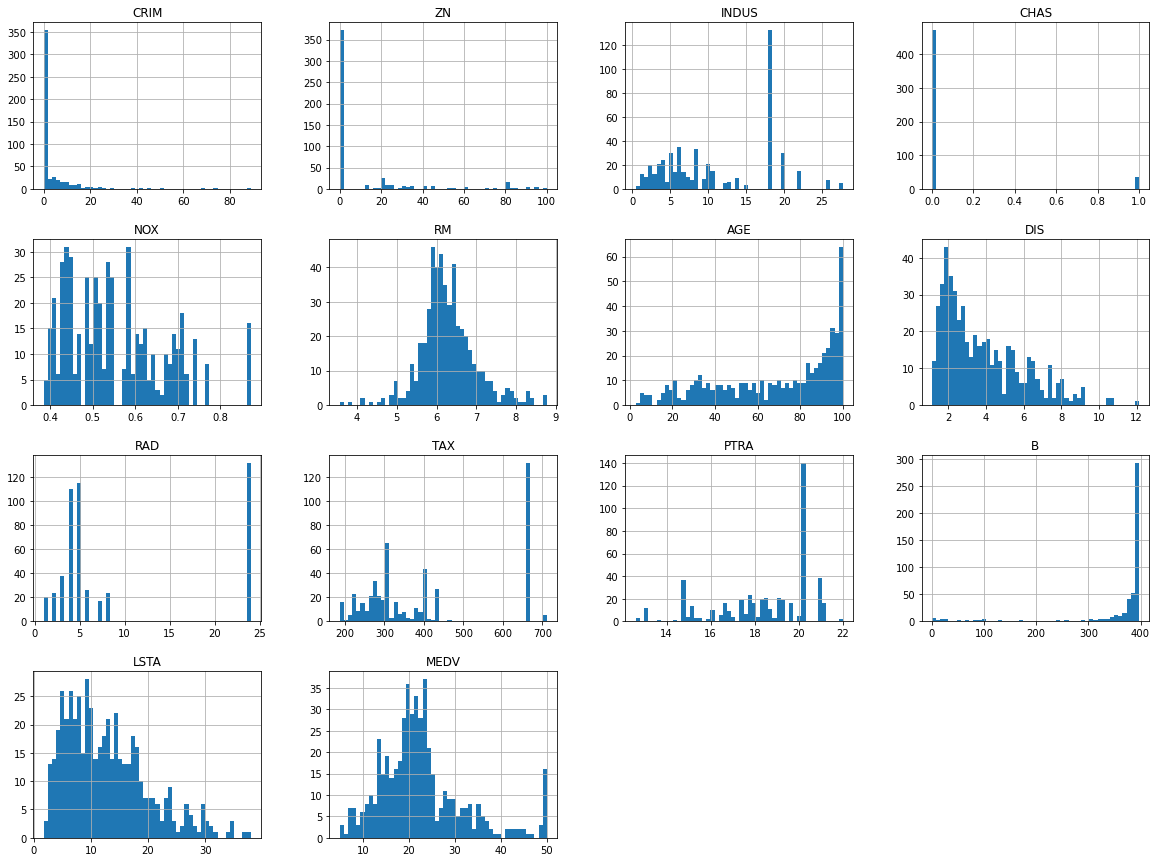

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Train-Test Splitting

In [8]:
# 1st step is to split data


# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = (shuffled[:test_set_size])
#     train_indices = (shuffled[test_set_size:])
#     return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)

In [9]:
train_set, test_set = train_test_split(housing, test_size =0.2, random_state=42)

print(f"Rows in train set = {len(train_set)}\nRows in test set =  {len(test_set)}")

Rows in train set = 404
Rows in test set =  102


In [10]:
# it is very important to get equal percentage of differant data

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    102 non-null    float64
 1   ZN      102 non-null    float64
 2   INDUS   102 non-null    float64
 3   CHAS    102 non-null    int64  
 4   NOX     102 non-null    float64
 5   RM      101 non-null    float64
 6   AGE     102 non-null    float64
 7   DIS     102 non-null    float64
 8   RAD     102 non-null    int64  
 9   TAX     102 non-null    int64  
 10  PTRA    102 non-null    float64
 11  B       102 non-null    float64
 12  LSTA    102 non-null    float64
 13  MEDV    102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [12]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
housing = strat_train_set

# Looking for Correlation

In [14]:
correlation = housing.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.258560,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.294130,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.377752,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.107359,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.299165,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.258560,0.294130,-0.377752,0.107359,-0.299165,1.000000,-0.239782,0.205787,-0.200739,-0.284687,-0.330136,0.122291,-0.598759,0.678859
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.239782,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.205787,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.200739,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.284687,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [15]:
correlation["MEDV"].sort_values(ascending = False)

MEDV     1.000000
RM       0.678859
B        0.361761
ZN       0.339741
DIS      0.240451
CHAS     0.205066
AGE     -0.364596
RAD     -0.374693
CRIM    -0.393715
NOX     -0.422873
TAX     -0.456657
INDUS   -0.473516
PTRA    -0.493534
LSTA    -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTA', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTA', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTA', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTA'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTA'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTA'>,
        <AxesSubplot:xlabel='LSTA', ylabel='LSTA'>]], dtype=object)

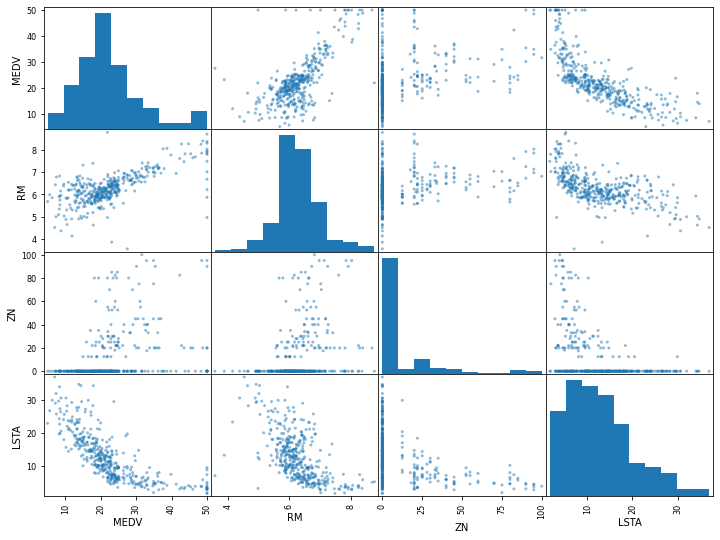

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTA"]
scatter_matrix(housing[attributes], figsize=(12,9))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

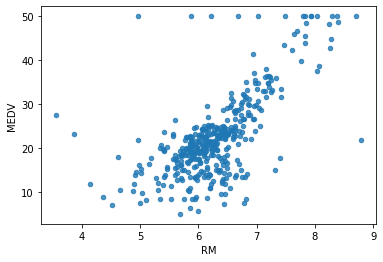

In [17]:
housing.plot(kind= "scatter", x="RM", y= "MEDV", alpha=0.8)

# Trying out Attibutes combination

In [18]:
# housing["TaxRM"] = housing["TAX"]/housing["RM"]
# housing.head()

In [19]:
correlation = housing.corr()
correlation["MEDV"].sort_values(ascending = False)

MEDV     1.000000
RM       0.678859
B        0.361761
ZN       0.339741
DIS      0.240451
CHAS     0.205066
AGE     -0.364596
RAD     -0.374693
CRIM    -0.393715
NOX     -0.422873
TAX     -0.456657
INDUS   -0.473516
PTRA    -0.493534
LSTA    -0.740494
Name: MEDV, dtype: float64

In [20]:
# housing.plot(kind= "scatter", x="TaxRM", y= "MEDV", alpha=0.8)

In [21]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attribute
 
 **three way to handle missing data**
- 1. Get rid of the missing data points
- 2. Get rid of the whole data points
- 3. set data points to mean, medium or 0

In [22]:
# first option for missing data
a = housing.dropna(subset=["RM"])
a.shape

(400, 13)

In [23]:
#  second option
housing.drop("RM", axis = 1).shape

# RM column is deleted from this method

(404, 12)

In [24]:
median = housing["RM"].median()
median

6.21

In [25]:
#  third option
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    6.210
Name: RM, Length: 404, dtype: float64

In [26]:
housing.shape

(404, 13)

In [27]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280463,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714609,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
x = imputer.transform(housing)

In [31]:
housing_tr = pd.DataFrame(x, columns = housing.columns)

In [32]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279765,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711088,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects

1. Estimators - it Estimate some parameter based on a dataset eg. imputer.it has fit method and transform method.fit method- Fits the dataset and calculates internal parameters.


2. Transformers - It takes input and returns output based on ther learning from fit(). it also has a covenience function called fit_transform() which fits and then transforms.


3. Predictors - LenearRigression model is an example of predictor. fit() and predictor() are two common function. it also gives score() function which will evaluate the prediction 

## Featur Scaling

Two types of Featur Scalling

1. Min-Max scalling (Normalization): (Value - min)/(max - min)
   sklearn provides a class called MinMaxScaler for this
   

2. Standarlization
   (value - min)/ std
   sklearn provides a class called StandardScalar for this

## Creating pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
#     .... add as many as you want in your pipeline
    ("std_scaler", StandardScaler()),
])

In [34]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280463,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714609,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Dragon Real Estates

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_lebels = housing_labels.iloc[:5]

In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([22.425, 25.155, 16.26 , 23.284, 23.579])

In [41]:
list(some_lebels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [43]:
rmse

1.2294834955547729

## Using better evaluating technique - Cross Validation 

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)

In [45]:
rmse_score

array([2.92667476, 2.90009676, 4.64872218, 2.67848423, 3.27603151,
       2.59321554, 4.88400791, 3.25613837, 3.15686893, 3.28568117])

In [46]:
def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standerd deviation", scores.std())

In [47]:
print_scores(rmse_score)

scores [2.92667476 2.90009676 4.64872218 2.67848423 3.27603151 2.59321554
 4.88400791 3.25613837 3.15686893 3.28568117]
mean 3.360592136004604
standerd deviation 0.7416015661142022


## outputs for differant model

1. For DecisionTreeRegressor model
          mean:   4.7122981254849945
          standerd deviation 0.7959168120303538
          
2. For LinearRegression model
        mean: 4.406721137587693
        standerd: deviation 1.2913972788067183
        
3. For RandomForestRegressor model
        mean: 3.389264732260769
        standerd: deviation 0.777291847962809
        
        
**Note** you can see the **RandomForestRegressor** is gives best output.

## saving the model

In [48]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

## testing the model on test data

In [49]:
X_test = strat_test_set.drop("MEDV", axis =1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse =np.sqrt(final_mse)


In [50]:
print(final_mse)

7.952344774509793


In [51]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24185173, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using Machine learning model

In [52]:
import numpy as np
from joblib import dump, load
model = load("Dragon.joblib")

features = np.array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24185173, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])
model.predict([features])

array([22.425])